In [79]:
import math
import matplotlib.pyplot as plt
import numpy as np


In [80]:
def f(x):
    return (x*x*x)-x-1


In [81]:
X=np.linspace(-1,2,500)
y=[f(i) for i in X]

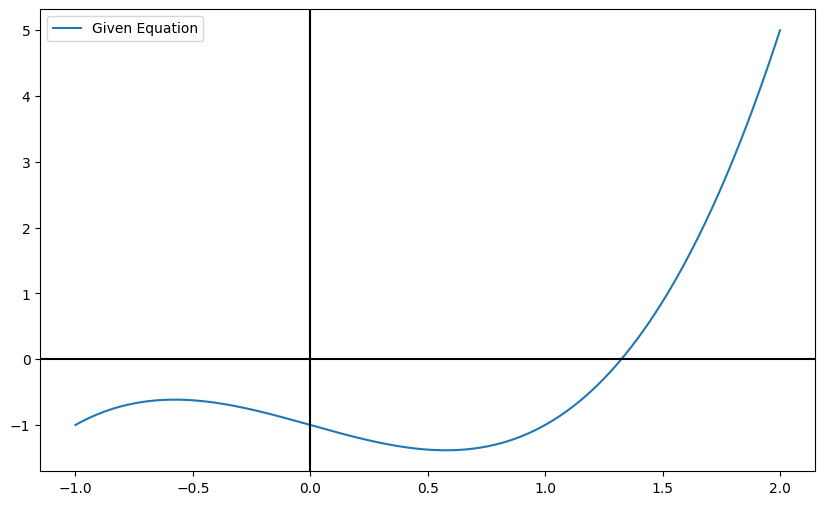

In [82]:
plt.figure(figsize=(10,6))
plt.plot(X,y,label='Given Equation')
plt.axvline(0,color='black')
plt.axhline(0,color='black')
plt.legend()
plt.show()

In [83]:
def value(x1,x0):
    x=x1-x0
    # print(x)
    y=(f(x1)-f(x0))
    # print(y)
    z=x/y
    # print(z)
    z=f(x1)*z
    # print(z)
    # print(x1-z)
    return x1-z

In [3]:
def Secent_Method(x_i,x_ii,threshold=0.005,max_iterations=100,verbose=True):
    iteration = 0
    results = []
    xr_old = x_ii
    converged = False
    if verbose:
        print("="*80)
        print(f"{'Iter':<5} {'xi':<15} {'x_i+1':<15} {'x_i+2 (root)':<15} {'f(x_i+2)':<15} {'εa (%)':<12}")
        print("="*80)
    
    while iteration<max_iterations:
        iteration+=1
        xr=value(x_ii,x_i)
        ea = abs((xr - xr_old) / xr) * 100 if xr != 0 else 0
        results.append({
            'Iteration': iteration,
            'x_i': x_i,
            'x_i+1': x_ii, 
            'xr': xr,
            'f(xr)': f(xr),
            'ea(%)': ea if ea != float('inf') else None,
            
        })
        if verbose:
            ea_str = f"{ea:.8f}" if ea != float('inf') else "N/A"
            print(f"{iteration:<5} {x_i:<15.10f} {x_ii:<15.10f} {xr:<15.10f} {f(xr):<15.10f} {ea_str:<12}")
        if iteration > 1 and ea < threshold:
            converged = True
            if verbose:
                print("="*80)
                print(f"CONVERGENCE ACHIEVED!")
                print(f"Approximate relative error = {ea:.10f}% < {threshold}%")
            break
        x_i=x_ii
        x_ii=xr
        xr_old=xr
    if not converged and verbose:
        print(f"Maximum iterations ({max_iterations}) reached without convergence")
    
    return results, xr

In [85]:
value(2,1)
# print(f(2))

1.1666666666666667

In [86]:
x_i=1
x_ii=2
thres=0.0005
results,final_root=Secent_Method(x_i,x_ii,thres)
print(f"\nFINAL RESULT:")
print(f"Root: x = {final_root:.10f}")
print(f"f(x) = {f(final_root):.10f}")
print(f"Total iterations: {len(results)}")

Iter  xi              x_i+1           x_i+2 (root)    f(x_i+2)        εa (%)      
1     1.0000000000    2.0000000000    1.1666666667    -0.5787037037   71.42857143 
2     2.0000000000    1.1666666667    1.2531120332    -0.2853630296   6.89845475  
3     1.1666666667    1.2531120332    1.3372064458    0.0538805867    6.28881299  
4     1.2531120332    1.3372064458    1.3238500964    -0.0036981154   1.00890195  
5     1.3372064458    1.3238500964    1.3247079365    -0.0000427343   0.06475693  
6     1.3238500964    1.3247079365    1.3247179654    0.0000000346    0.00075705  
7     1.3247079365    1.3247179654    1.3247179572    -0.0000000000   0.00000061  
CONVERGENCE ACHIEVED!
Approximate relative error = 0.0000006121% < 0.0005%

FINAL RESULT:
Root: x = 1.3247179572
f(x) = -0.0000000000
Total iterations: 7
